## Dataset Statisitcal Analysis

In [118]:
from utils import *
from chess_feature_extractors import *
import matplotlib.pyplot as plt
from IPython.display import SVG, display
import chess.svg
games_df = pd.read_csv("./Maia-Leela-Stock-empiricalQ.csv")
unique_games_df = games_df.drop_duplicates(subset='game')
grouped_df = unique_games_df.groupby('game')['result'].value_counts().unstack(fill_value=0)
total_wins = grouped_df['win'].sum()
total_losses = grouped_df['lose'].sum()
total_draws = grouped_df['draw'].sum()
win_percent = total_wins / (total_wins + total_draws + total_losses) * 100
print(f"Total wins number: {total_wins}\n"
      f"Total losses number: {total_losses}\n"
      f"Total draws number: {total_draws}")
print(f"Win percent: {win_percent.__round__(3)}%")

Total wins number: 7405
Total losses number: 604
Total draws number: 486
Win percent: 87.169%


In [119]:
grouped_df = games_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
grouped_df['moves_num'] = grouped_df['agreed'] + grouped_df['leela10b2500'] + grouped_df['maia1200'] + grouped_df['random']
grouped_df['agreed_percent'] = ((grouped_df['agreed'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['random_percent'] = ((grouped_df['random'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['leela_percent'] = ((grouped_df['leela10b2500'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['maia_percent'] = ((grouped_df['maia1200'] / grouped_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in a game: {grouped_df['agreed_percent'].mean().__round__(3)}%, variance: {grouped_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in a game: {grouped_df['random_percent'].mean().__round__(3)}%, variance: {grouped_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in a game: {grouped_df['leela_percent'].mean().__round__(3)}%, variance: {grouped_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in a game: {grouped_df['maia_percent'].mean().__round__(3)}%, variance: {grouped_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in a game: 58.665%, variance: 89.216
Average percent of random moves in a game: 15.576%, variance: 98.322
Average percent of Leela moves in a game: 16.177%, variance: 86.358
Average percent of Maia moves in a game: 9.582%, variance: 54.649


In [120]:
win_df = games_df[games_df['result'] == 'win']
win_df = win_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
win_df['moves_num'] = win_df['agreed'] + win_df['leela10b2500'] + win_df['maia1200'] + win_df['random']
win_df['agreed_percent'] = ((win_df['agreed'] / win_df['moves_num']) * 100).__round__(3)
win_df['random_percent'] = ((win_df['random'] / win_df['moves_num']) * 100).__round__(3)
win_df['leela_percent'] = ((win_df['leela10b2500'] / win_df['moves_num']) * 100).__round__(3)
win_df['maia_percent'] = ((win_df['maia1200'] / win_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in won games: {win_df['agreed_percent'].mean().__round__(3)}%, variance: {win_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in won games: {win_df['random_percent'].mean().__round__(3)}%, variance: {win_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in won games: {win_df['leela_percent'].mean().__round__(3)}%, variance: {win_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in won games: {win_df['maia_percent'].mean().__round__(3)}%, variance: {win_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in won games: 58.303%, variance: 86.815
Average percent of random moves in won games: 16.757%, variance: 93.854
Average percent of Leela moves in won games: 15.594%, variance: 84.339
Average percent of Maia moves in won games: 9.346%, variance: 56.052


In [121]:
lose_df = games_df[games_df['result'] == 'lose']
lose_df = lose_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
lose_df['moves_num'] = lose_df['agreed'] + lose_df['leela10b2500'] + lose_df['maia1200'] + lose_df['random']
lose_df['agreed_percent'] = ((lose_df['agreed'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['random_percent'] = ((lose_df['random'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['leela_percent'] = ((lose_df['leela10b2500'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['maia_percent'] = ((lose_df['maia1200'] / lose_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in lost games: {lose_df['agreed_percent'].mean().__round__(3)}%, variance: {lose_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in lost games: {lose_df['random_percent'].mean().__round__(3)}%, variance: {lose_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in lost games: {lose_df['leela_percent'].mean().__round__(3)}%, variance: {lose_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in lost games: {lose_df['maia_percent'].mean().__round__(3)}%, variance: {lose_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in lost games: 60.356%, variance: 98.053
Average percent of random moves in lost games: 10.193%, variance: 58.947
Average percent of Leela moves in lost games: 18.017%, variance: 65.415
Average percent of Maia moves in lost games: 11.434%, variance: 42.175


General statistics of the scores and confidence for each bot:

In [122]:
disagreement_df = games_df.loc[games_df['contributor'] == ('leela10b2500' or 'maia1200')]
selected = ['maia1200_eval', 'maia1200_conf', 'leela10b2500_eval', 'leela10b2500_conf']
conf_eval = disagreement_df[selected]
conf_eval.describe()

,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,56418.000000,56418.000000,56418.000000,56418.000000
mean,0.474346,0.852434,0.712869,0.883633
std,0.266778,0.181934,0.234694,0.170773
min,0.000000,0.200000,0.020000,0.200000
25%,0.280000,0.800000,0.540000,0.800000
50%,0.440000,1.000000,0.720000,1.000000
75%,0.660000,1.000000,0.940000,1.000000
max,0.980000,1.000000,1.000000,1.000000


Now, let's look at the eval and confidence statistics of each bot when its move is chosen.

In [123]:
maia_df = games_df.loc[games_df['contributor'] == 'maia1200']
leela_df = games_df.loc[games_df['contributor'] == 'leela10b2500']
maia_df = maia_df[selected]
leela_df = leela_df[selected]

print("Confidence and eval stats when Maia is chosen:")
maia_df.describe()

Confidence and eval stats when Maia is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,32346.000000,32346.000000,32346.000000,32346.000000
mean,0.756683,0.889600,0.584128,0.849379
std,0.276748,0.166077,0.306924,0.185017
min,0.020000,0.400000,0.000000,0.200000
25%,0.580000,0.800000,0.360000,0.600000
50%,0.860000,1.000000,0.580000,1.000000
75%,1.000000,1.000000,0.880000,1.000000
max,1.000000,1.000000,0.980000,1.000000


In [124]:
print("Confidence and eval stats when Leela is chosen:")
leela_df.describe()

Confidence and eval stats when Leela is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,56418.000000,56418.000000,56418.000000,56418.000000
mean,0.474346,0.852434,0.712869,0.883633
std,0.266778,0.181934,0.234694,0.170773
min,0.000000,0.200000,0.020000,0.200000
25%,0.280000,0.800000,0.540000,0.800000
50%,0.440000,1.000000,0.720000,1.000000
75%,0.660000,1.000000,0.940000,1.000000
max,0.980000,1.000000,1.000000,1.000000


Now we'll calculate the Pearson correlation between eval and confidence for each bot:

In [125]:
correlation_matrix = disagreement_df.corr()
maia_conf_eval_correlation = correlation_matrix.loc['maia1200_conf', 'maia1200_eval']
print(f"Correlation between Maia confidence and eval: {maia_conf_eval_correlation.__round__(3)}")
leela_conf_eval_correlation = correlation_matrix.loc['leela10b2500_conf', 'leela10b2500_eval']
print(f"Correlation between Leela confidence and eval: {leela_conf_eval_correlation.__round__(3)}")

Correlation between Maia confidence and eval: 0.048
Correlation between Leela confidence and eval: 0.126


As we can see, the Pearson correlation of confidence and eval in both Maia and Leela is positive, which implies direct relationship, when one goes up, the other usually goes up.
Next we'll look at the Pearson correlation of confidence and move number and of eval and move number.

In [126]:
maia_conf_move_correlation = correlation_matrix.loc['maia1200_conf', 'ply']
maia_eval_move_correlation = correlation_matrix.loc['maia1200_eval', 'ply']
leela_conf_move_correlation = correlation_matrix.loc['leela10b2500_conf', 'ply']
leela_eval_move_correlation = correlation_matrix.loc['leela10b2500_eval', 'ply']

print(f"Correlation between Maia confidence and move number: {maia_conf_move_correlation.__round__(3)}")
print(f"Correlation between Maia eval and move number: {maia_eval_move_correlation.__round__(3)}")
print(f"Correlation between Leela confidence and move number: {leela_conf_move_correlation.__round__(3)}")
print(f"Correlation between Leela eval and move number: {leela_eval_move_correlation.__round__(3)}")

Correlation between Maia confidence and move number: 0.035
Correlation between Maia eval and move number: 0.117
Correlation between Leela confidence and move number: -0.108
Correlation between Leela eval and move number: -0.011


From this we can learn that Maia's confidence and eval rise a bit as the game progresses, unlike Leela.

Next, we'll want to plot each bot's mean evaluation and confidence as a function of move number to see the way it shifts during the game.

Text(0, 0.5, 'Mean Evaluation')

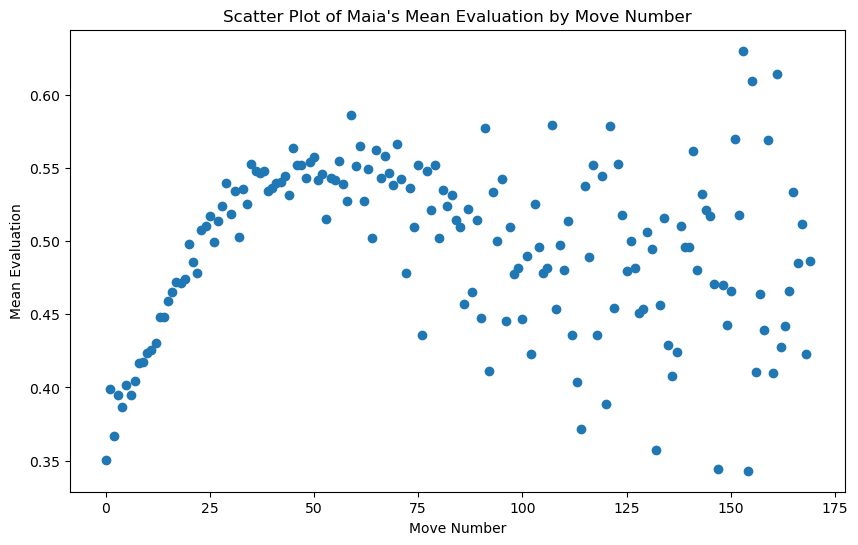

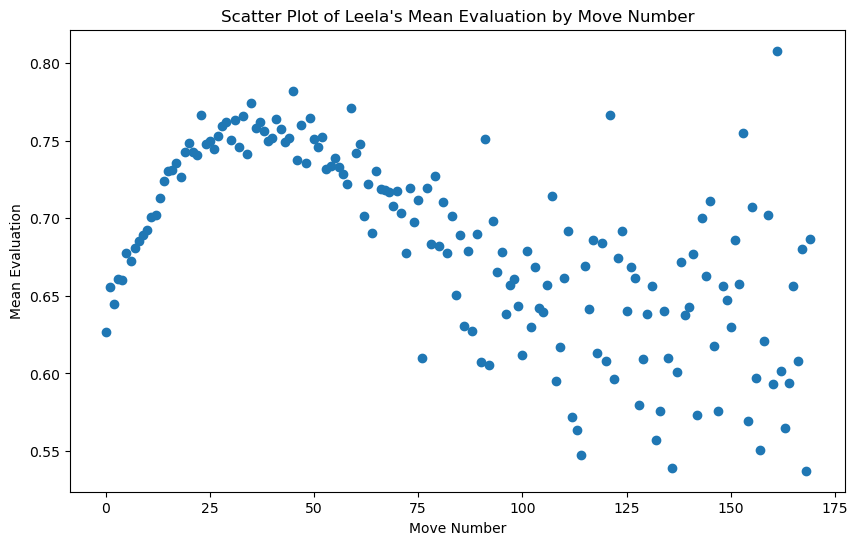

In [127]:
mean_evaluation_by_move = disagreement_df.groupby('ply')['maia1200_eval'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_eval'], label="Maia's Evaluation")
plt.title("Scatter Plot of Maia's Mean Evaluation by Move Number")
plt.xlabel('Move Number')
plt.ylabel('Mean Evaluation')
mean_evaluation_by_move = disagreement_df.groupby('ply')['leela10b2500_eval'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_eval'], label="Leela's Evaluation")
plt.title("Scatter Plot of Leela's Mean Evaluation by Move Number")
plt.xlabel('Move Number')
plt.ylabel('Mean Evaluation')

Text(0, 0.5, 'Mean Confidence')

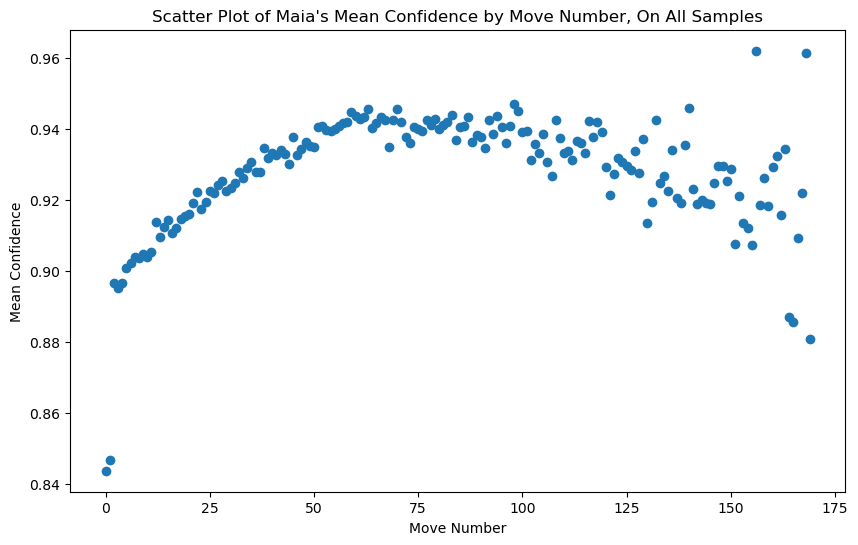

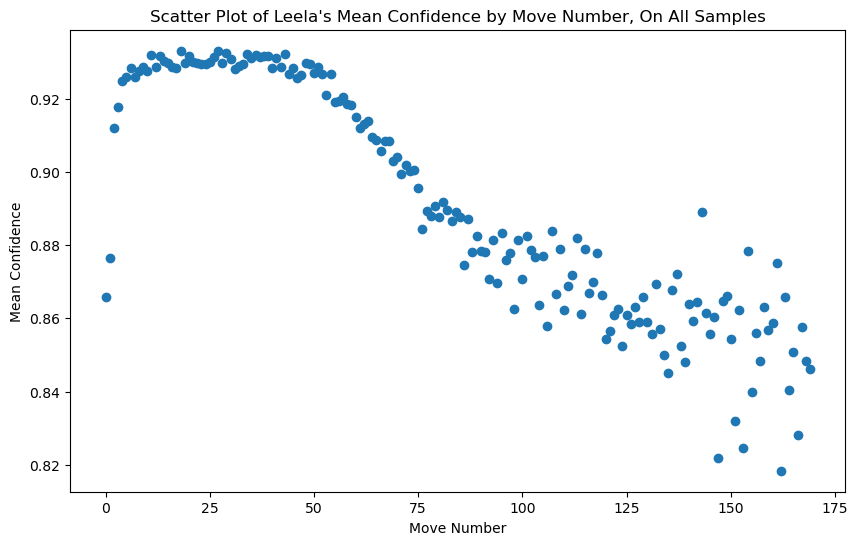

In [128]:
mean_evaluation_by_move = games_df.groupby('ply')['maia1200_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_conf'], label="Maia's Confidence")
plt.title("Scatter Plot of Maia's Mean Confidence by Move Number, On All Samples")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')
mean_evaluation_by_move = games_df.groupby('ply')['leela10b2500_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_conf'], label="Leela's Confidence")
plt.title("Scatter Plot of Leela's Mean Confidence by Move Number, On All Samples")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')

Text(0, 0.5, 'Mean Confidence')

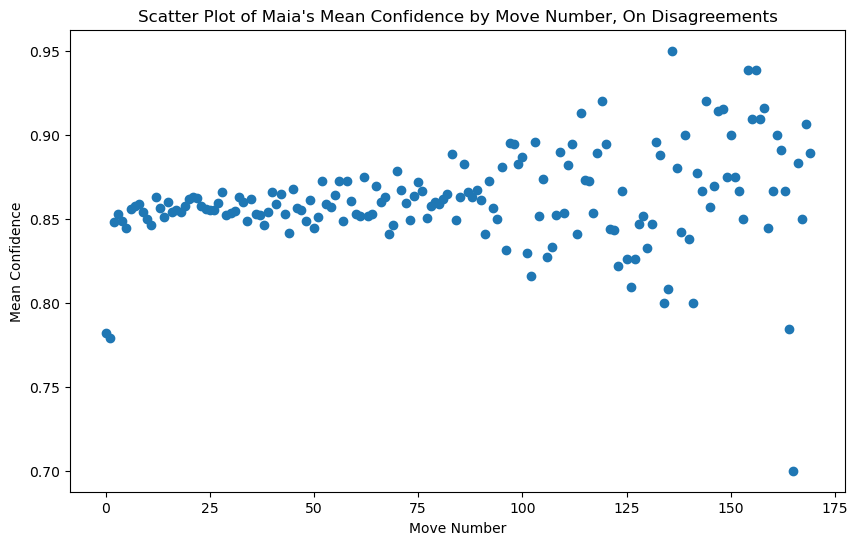

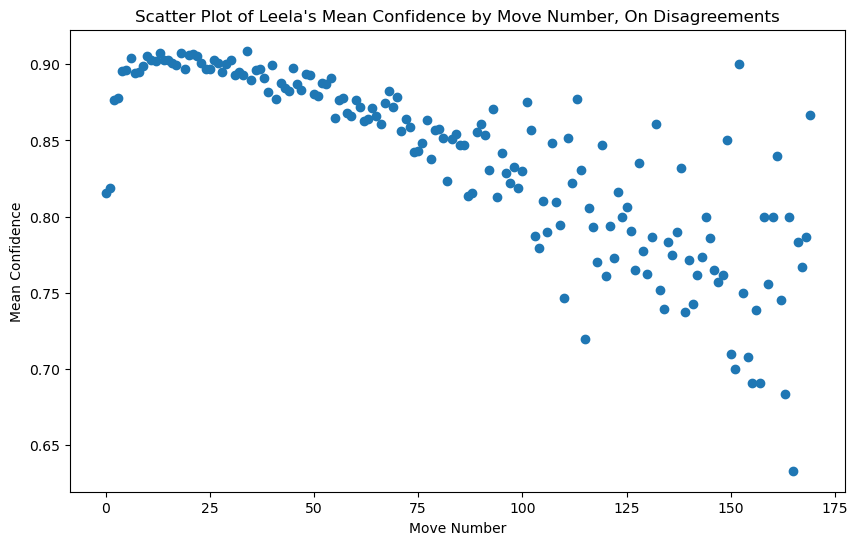

In [129]:
mean_evaluation_by_move = disagreement_df.groupby('ply')['maia1200_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_conf'], label="Maia's Confidence")
plt.title("Scatter Plot of Maia's Mean Confidence by Move Number, On Disagreements")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')
mean_evaluation_by_move = disagreement_df.groupby('ply')['leela10b2500_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_conf'], label="Leela's Confidence")
plt.title("Scatter Plot of Leela's Mean Confidence by Move Number, On Disagreements")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')

In [150]:
print("Mean values of board features when Maia is better:")
for i in range(len(mean_vec)):
    print(f"Feature: {feature_names[i]}, mean: {mean_vec[i]}")

Mean values of board features when Maia is better:
Feature: color, mean: 0.500896556
Feature: move_num, mean: 38.7775923
Feature: legal_moves_player, mean: 32.4530699
Feature: legal_moves_opponent, mean: 30.650405
Feature: legal_captures_player, mean: 2.06180053
Feature: legal_captures_opponent, mean: 2.13077351
Feature: in_check, mean: 0.0425091201
Feature: check_to_give_player, mean: 0.590273913
Feature: check_to_give_opponent, mean: 0.505812156
Feature: queen_threatened_player, mean: 0.0594818525
Feature: queen_threatened_opponent, mean: 0.0200024733
Feature: castling_rights_player, mean: 0.05147468
Feature: castling_rights_opponent, mean: 0.0774748037
Feature: enough_material_to_win_player, mean: 0.00788350955
Feature: enough_material_to_win_opponent, mean: 0.0137265813
Feature: number_pieces_player, mean: 9.88997094
Feature: number_pieces_opponent, mean: 9.38310765
Feature: materiel_points_player, mean: 23.7378656
Feature: material_points_opponent, mean: 22.3540469
Feature: knight

In [131]:
games_df["maia_better"] = games_df['maia1200_eval'] > games_df['leela10b2500_eval']
games_df["leela_better"] = games_df['leela10b2500_eval'] > games_df['maia1200_eval']
maia_better_df = games_df[games_df['maia_better'] == True]
maia_better_sam = maia_better_df.sample(100)
leela_better_df = games_df[games_df['leela_better'] == True]
# feats_arr = maia_better_sam['position'].apply(board_features).apply(lambda feat: feat.extract())
# vector_array = np.array(feats_arr)
# mean_vector = np.mean(vector_array, axis=0)

Now, we'll check the move properties in disagreements, when Maia's move is better, and when Leela's move is better.

In [132]:
move_feats_diss_maia = []
for ind, row in disagreement_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_diss_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_diss_maia = np.array(move_feats_diss_maia)
mean_vector_diss_maia = np.mean(vector_array_diss_maia, axis=0)
variance_vector_diss_maia = np.var(vector_array_diss_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                 6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features in disagreements:")
for i, (mean, var) in enumerate(zip(mean_vector_diss_maia, variance_vector_diss_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")


Maia's move features in disagreements:
distance: Mean = 1.8, Variance = 1.288
king approach: Mean = -0.783, Variance = 1.672
advance/ retreat: Mean = 0.122, Variance = 0.107
flanking: Mean = 0.773, Variance = 0.175
pawn: Mean = 0.253, Variance = 0.189
rook: Mean = 0.183, Variance = 0.149
knight: Mean = 0.18, Variance = 0.147
bishop: Mean = 0.176, Variance = 0.145
queen: Mean = 0.119, Variance = 0.105
king: Mean = 0.089, Variance = 0.081
check: Mean = 0.091, Variance = 0.082
capture: Mean = 0.262, Variance = 0.193
castle: Mean = 0.014, Variance = 0.014


In [133]:
move_feats_diss_leela = []
for ind, row in disagreement_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_diss_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_diss_leela = np.array(move_feats_diss_leela)
mean_vector_diss_leela = np.mean(vector_array_diss_leela, axis=0)
variance_vector_diss_leela = np.var(vector_array_diss_leela, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                 6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Leela's move features in disagreements:")
for i, (mean, var) in enumerate(zip(mean_vector_diss_leela, variance_vector_diss_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features in disagreements:
distance: Mean = 1.763, Variance = 1.041
king approach: Mean = -0.56, Variance = 1.707
advance/ retreat: Mean = 0.172, Variance = 0.143
flanking: Mean = 0.772, Variance = 0.176
pawn: Mean = 0.238, Variance = 0.181
rook: Mean = 0.205, Variance = 0.163
knight: Mean = 0.155, Variance = 0.131
bishop: Mean = 0.161, Variance = 0.135
queen: Mean = 0.143, Variance = 0.123
king: Mean = 0.097, Variance = 0.088
check: Mean = 0.031, Variance = 0.03
capture: Mean = 0.116, Variance = 0.103
castle: Mean = 0.008, Variance = 0.008


In [134]:
move_feats_maia = []
for ind, row in maia_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_maia = np.array(move_feats_maia)
mean_vector_maia = np.mean(vector_array_maia, axis=0)
variance_vector_maia = np.var(vector_array_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features when it's better:")
for i, (mean, var) in enumerate(zip(mean_vector_maia, variance_vector_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features when it's better:
distance: Mean = 1.842, Variance = 1.38
king approach: Mean = -0.682, Variance = 1.843
advance/ retreat: Mean = 0.158, Variance = 0.133
flanking: Mean = 0.774, Variance = 0.175
pawn: Mean = 0.225, Variance = 0.174
rook: Mean = 0.212, Variance = 0.167
knight: Mean = 0.153, Variance = 0.13
bishop: Mean = 0.154, Variance = 0.13
queen: Mean = 0.152, Variance = 0.129
king: Mean = 0.105, Variance = 0.094
check: Mean = 0.122, Variance = 0.107
capture: Mean = 0.19, Variance = 0.154
castle: Mean = 0.009, Variance = 0.009


In [135]:
move_feats_leela = []
for ind, row in maia_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_leela = np.array(move_feats_leela)
mean_vector_leela = np.mean(vector_array_leela, axis=0)
variance_vector_leela = np.var(vector_array_leela, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Leela's move features when Maia's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_leela, variance_vector_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features when Maia's move is better:
distance: Mean = 1.764, Variance = 1.197
king approach: Mean = -0.522, Variance = 1.766
advance/ retreat: Mean = 0.173, Variance = 0.143
flanking: Mean = 0.784, Variance = 0.17
pawn: Mean = 0.225, Variance = 0.174
rook: Mean = 0.219, Variance = 0.171
knight: Mean = 0.136, Variance = 0.118
bishop: Mean = 0.151, Variance = 0.128
queen: Mean = 0.155, Variance = 0.131
king: Mean = 0.114, Variance = 0.101
check: Mean = 0.06, Variance = 0.056
capture: Mean = 0.167, Variance = 0.139
castle: Mean = 0.006, Variance = 0.006


In [136]:
move_feats_maia = []
for ind, row in leela_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_maia = np.array(move_feats_maia)
mean_vector_maia = np.mean(vector_array_maia, axis=0)
variance_vector_maia = np.var(vector_array_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features when Leela's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_maia, variance_vector_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features when Leela's move is better:
distance: Mean = 1.8, Variance = 1.288
king approach: Mean = -0.783, Variance = 1.672
advance/ retreat: Mean = 0.122, Variance = 0.107
flanking: Mean = 0.773, Variance = 0.175
pawn: Mean = 0.253, Variance = 0.189
rook: Mean = 0.183, Variance = 0.149
knight: Mean = 0.18, Variance = 0.147
bishop: Mean = 0.176, Variance = 0.145
queen: Mean = 0.119, Variance = 0.105
king: Mean = 0.089, Variance = 0.081
check: Mean = 0.091, Variance = 0.082
capture: Mean = 0.262, Variance = 0.193
castle: Mean = 0.014, Variance = 0.014


In [137]:
move_feats_leela = []
for ind, row in leela_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_leela = np.array(move_feats_leela)
mean_vector_leela = np.mean(vector_array_leela, axis=0)
variance_vector_leela = np.var(vector_array_leela, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Leela's move features when it's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_leela, variance_vector_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features when it's move is better:
distance: Mean = 1.763, Variance = 1.041
king approach: Mean = -0.56, Variance = 1.707
advance/ retreat: Mean = 0.172, Variance = 0.143
flanking: Mean = 0.772, Variance = 0.176
pawn: Mean = 0.238, Variance = 0.181
rook: Mean = 0.205, Variance = 0.163
knight: Mean = 0.155, Variance = 0.131
bishop: Mean = 0.161, Variance = 0.135
queen: Mean = 0.143, Variance = 0.123
king: Mean = 0.097, Variance = 0.088
check: Mean = 0.031, Variance = 0.03
capture: Mean = 0.116, Variance = 0.103
castle: Mean = 0.008, Variance = 0.008


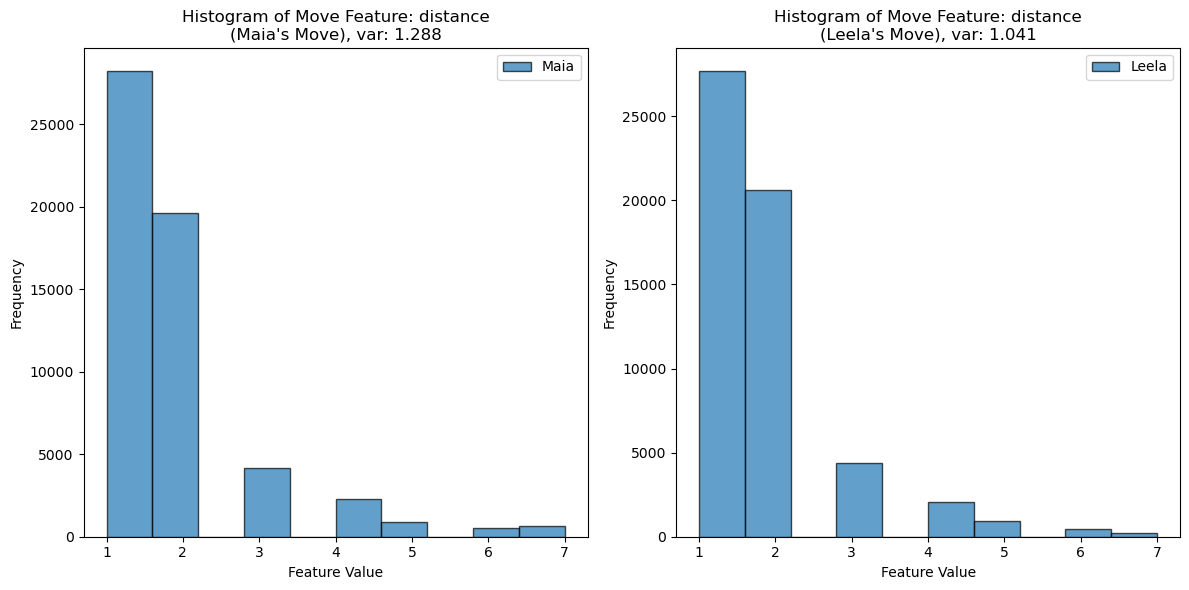

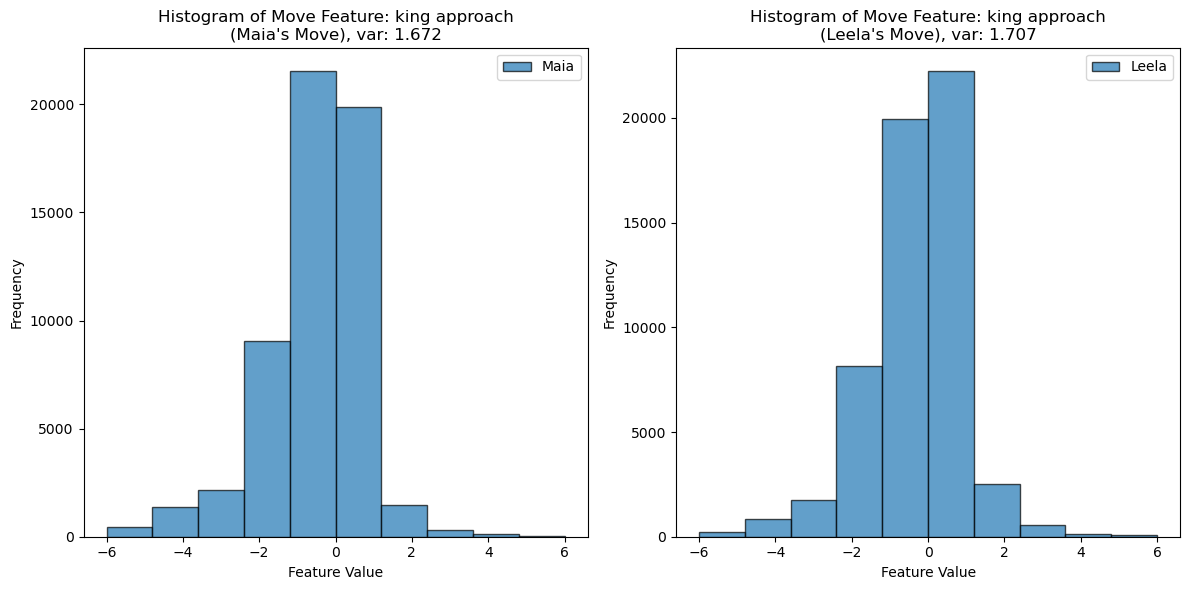

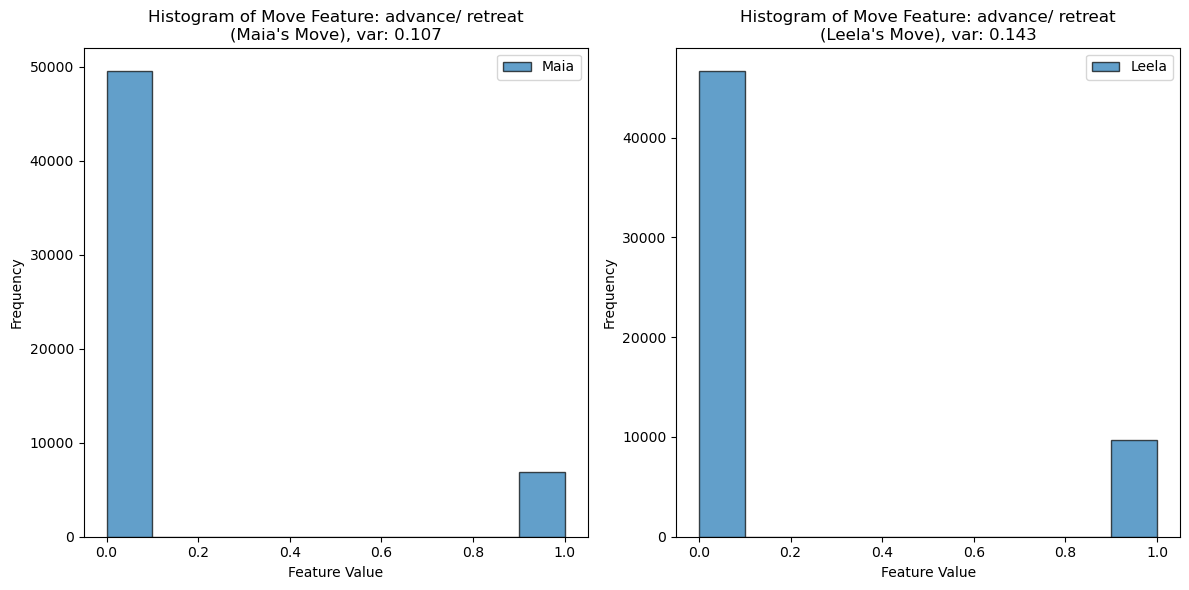

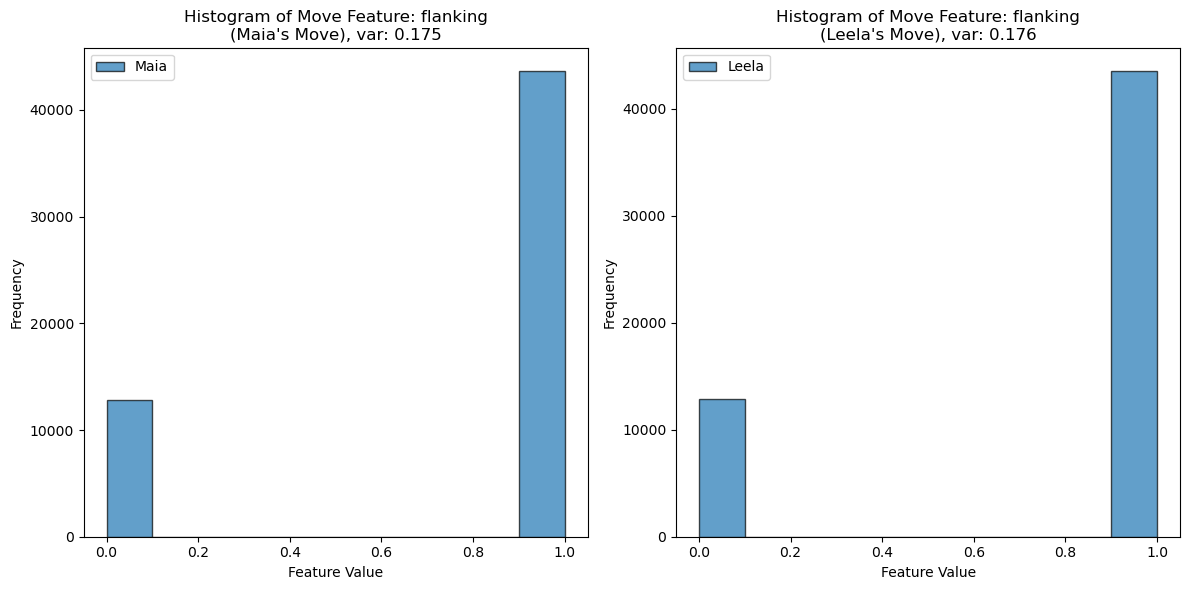

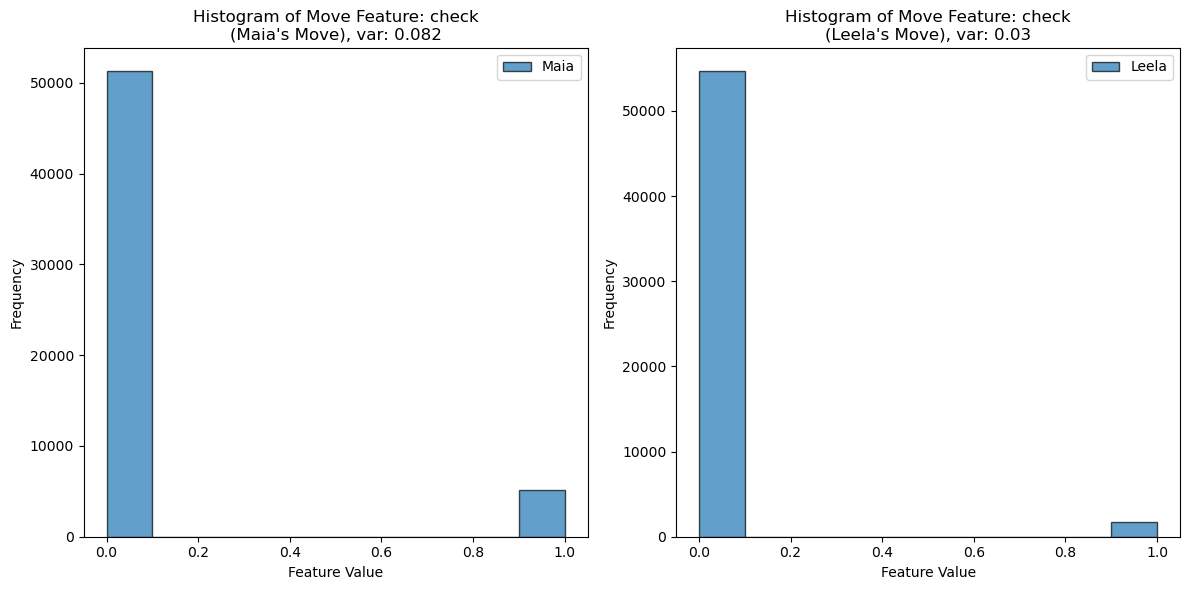

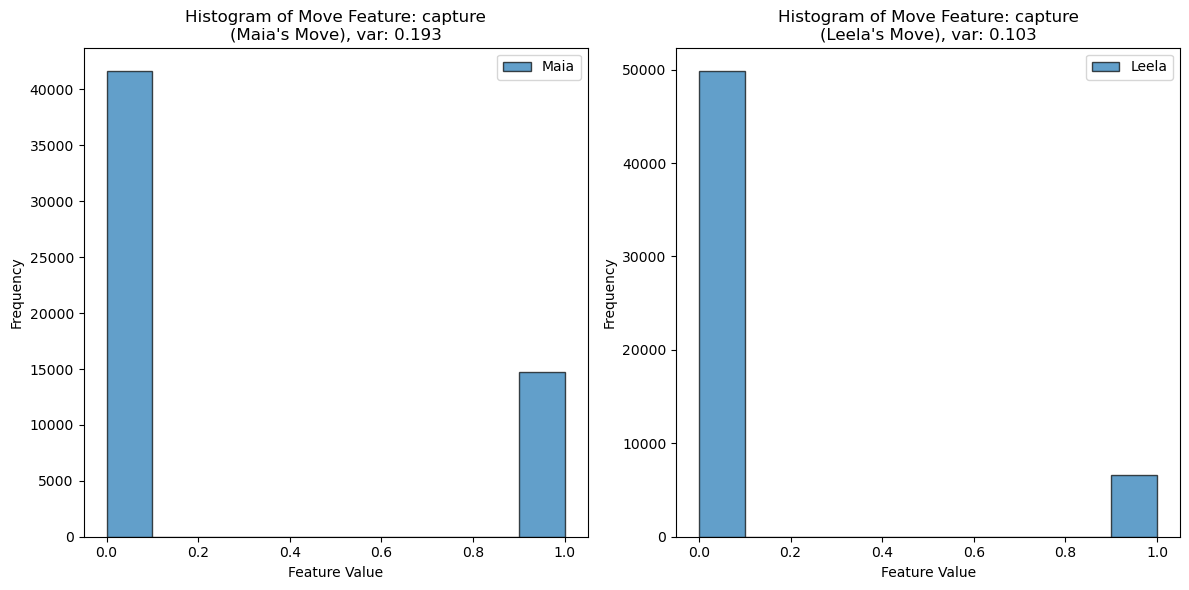

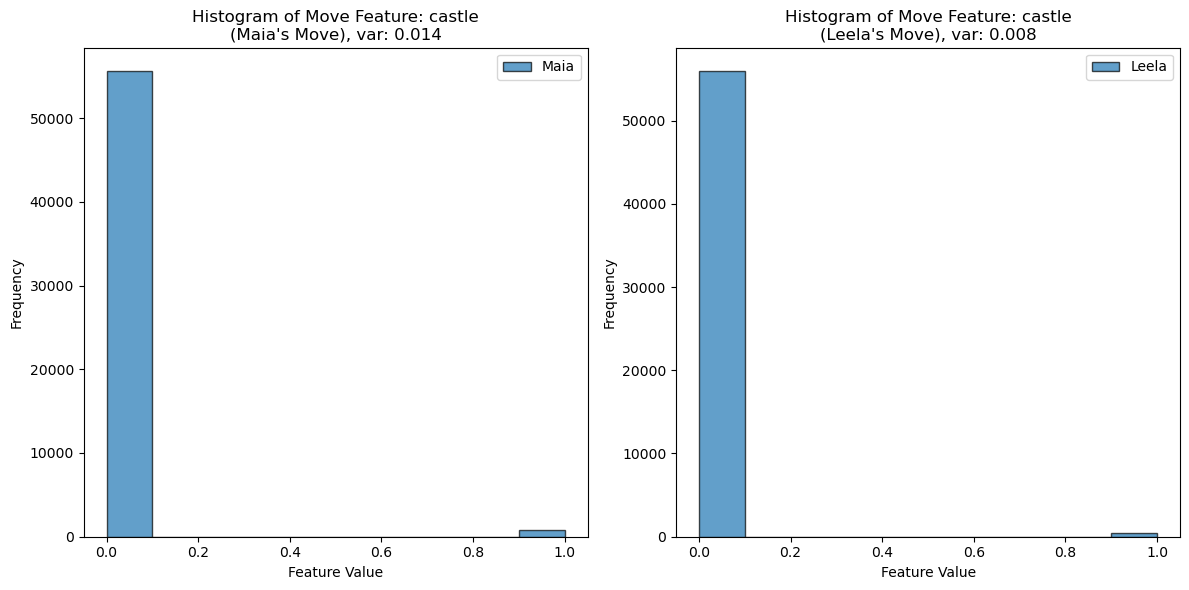

In [138]:
for i in range(vector_array_maia.shape[1]):
    if 4 <= i <= 9:
        continue
    plt.figure(figsize=(12, 6))

    # Create Maia's histogram
    plt.subplot(1, 2, 1)
    plt.hist(vector_array_maia[:, i], bins=10, edgecolor='black', alpha=0.7, label='Maia')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Maia's Move), var: {variance_vector_maia[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()

    # Create Leela's histogram
    plt.subplot(1, 2, 2)
    plt.hist(vector_array_leela[:, i], bins=10, edgecolor='black', alpha=0.7, label='Leela')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Leela's Move), var: {variance_vector_leela[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

Now, we'll look for the situations in which the difference between Maia's eval and Leela's eval was the largest in favor of Maia, and check if we can find a pattern.

Maia's move: e6h6, Leela's move: e6e3, result: lose, Maia's eval: 1.0, Leela's eval: 0.0


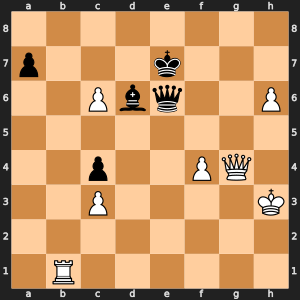

Maia's move: f7f6, Leela's move: d6d5, result: lose, Maia's eval: 1.0, Leela's eval: 0.0


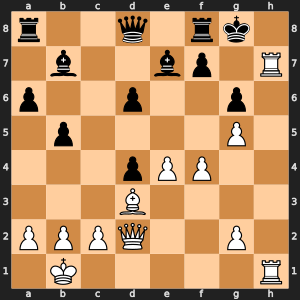

Maia's move: f7f6, Leela's move: e8e2, result: win, Maia's eval: 1.0, Leela's eval: 0.0


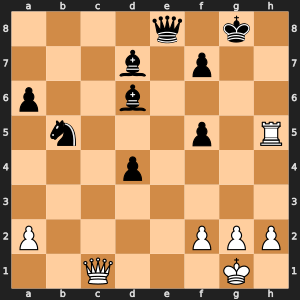

Maia's move: c8g4, Leela's move: c8f8, result: win, Maia's eval: 1.0, Leela's eval: 0.0


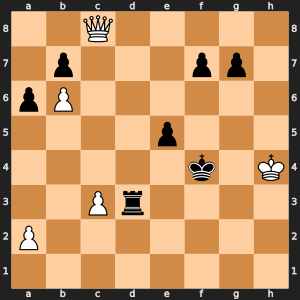

Maia's move: d7e5, Leela's move: f5e7, result: win, Maia's eval: 1.0, Leela's eval: 0.0


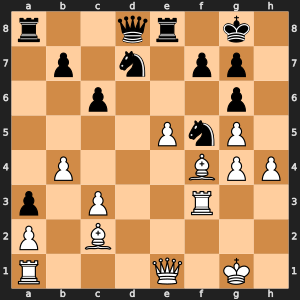

In [139]:
games_df["eval_diff"] = games_df["maia1200_eval"] - games_df["leela10b2500_eval"]
top_samples = games_df.nlargest(5, 'eval_diff')
boards = [chess.Board(row['position']) for index, row in top_samples.iterrows()]
for index, row in top_samples.iterrows():
    board = chess.Board(row['position'])
    print(f"Maia's move: {row['maia1200_move']}, Leela's move: {row['leela10b2500_move']}, result: {row['result']}, Maia's eval: {row['maia1200_eval']}, Leela's eval: {row['leela10b2500_eval']}")
    display(SVG(chess.svg.board(board, size=300)))

We can see that for all these top moves, Maia's eval is 1, while Leela's eval is 0. That's surprising, so it'd be good to check how many times this happens.

In [140]:
maia_1_leela_0 = games_df[games_df['maia1200_eval'] == 1]
maia_1_leela_0 = maia_1_leela_0[maia_1_leela_0['leela10b2500_eval'] == 0]
print(f"Number of situations where Maia has 1 eval and Leela 0: {len(maia_1_leela_0)}")

Number of situations where Maia has 1 eval and Leela 0: 68


The situations in which Leela's eval was much better:

Maia's move: g8f8, Leela's move: d7e7, result: win, Maia's eval: 0.0, Leela's eval: 1.0


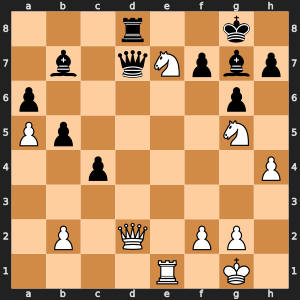

Maia's move: c6e4, Leela's move: f6f3, result: win, Maia's eval: 0.0, Leela's eval: 1.0


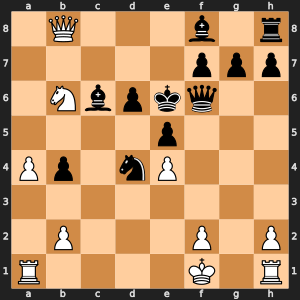

Maia's move: d7e7, Leela's move: d7c8, result: win, Maia's eval: 0.0, Leela's eval: 1.0


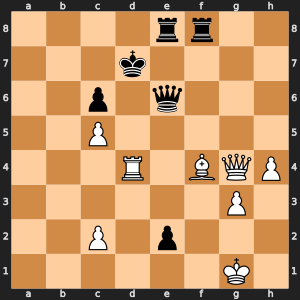

Maia's move: g4d7, Leela's move: d2d7, result: win, Maia's eval: 0.0, Leela's eval: 1.0


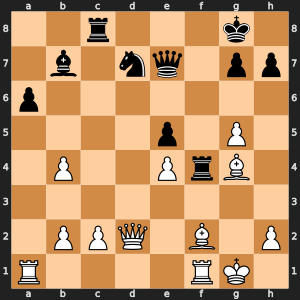

Maia's move: d3c3, Leela's move: h1c1, result: win, Maia's eval: 0.0, Leela's eval: 1.0


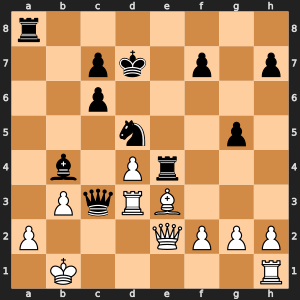

In [141]:
games_df["eval_diff"] = games_df["maia1200_eval"] - games_df["leela10b2500_eval"]
top_samples = games_df.nsmallest(5, 'eval_diff')
boards = [chess.Board(row['position']) for index, row in top_samples.iterrows()]
for index, row in top_samples.iterrows():
    board = chess.Board(row['position'])
    print(f"Maia's move: {row['maia1200_move']}, Leela's move: {row['leela10b2500_move']}, result: {row['result']}, Maia's eval: {row['maia1200_eval']}, Leela's eval: {row['leela10b2500_eval']}")
    display(SVG(chess.svg.board(board, size=300)))

In [142]:
maia_0_leela_1 = games_df[games_df['maia1200_eval'] == 0]
maia_0_leela_1 = maia_0_leela_1[maia_0_leela_1['leela10b2500_eval'] == 1]
print(f"Number of situations where Maia has 0 eval and Leela 1: {len(maia_0_leela_1)}")

Number of situations where Maia has 0 eval and Leela 1: 46
